Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_36 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 76s 415ms/step - accuracy: 0.4662 - loss: 1.1584 - val_accuracy: 0.6972 - val_loss: 0.7849
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 69s 384ms/step - accuracy: 0.7145 - loss: 0.7262 - val_accuracy: 0.6568 - val_loss: 0.9262
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 378ms/step - accuracy: 0.7543 - loss: 0.6400 - val_accuracy: 0.6842 - val_loss: 0.9322
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 87s 486ms/step - accuracy: 0.7704 - loss: 0.5786 - val_accuracy: 0.7429 - val_loss: 0.7190
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 122s 682ms/step - accuracy: 0.7937 - loss: 0.5441 - val_accuracy: 0.7704 - val_loss: 0.5728
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 113s 629ms/step - accuracy: 0.8070 - loss: 0.5024 - val_accuracy: 0.7468 - val_loss: 0.7126
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 97s 541ms/step - accuracy: 0.8251 - loss: 0.4674 - val_accuracy: 0.7735 - val_loss: 0.5959
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 100s 561ms/step - accuracy: 0.8409 - loss

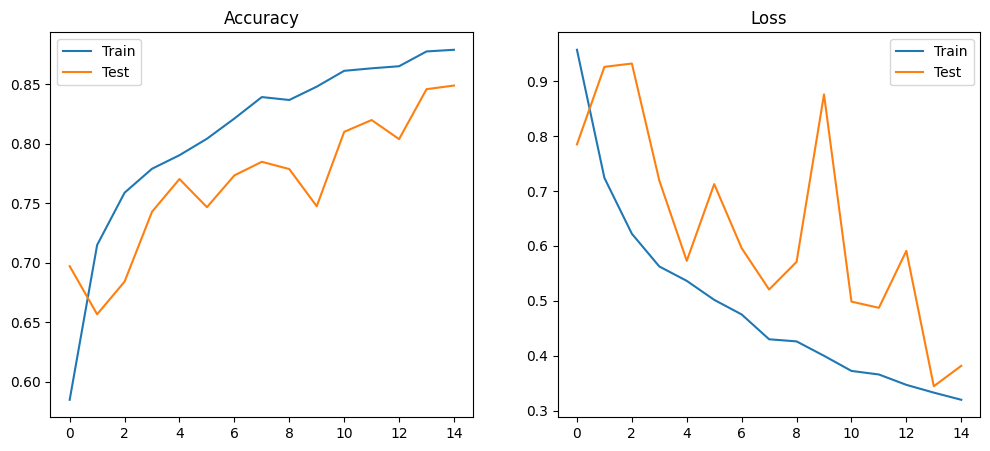

41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step
Classification Report:
               precision    recall  f1-score   support

      glioma       0.95      0.75      0.84       300
  meningioma       0.73      0.63      0.68       306
     notumor       0.84      1.00      0.91       405
   pituitary       0.88      0.97      0.93       300

    accuracy                           0.85      1311
   macro avg       0.85      0.84      0.84      1311
weighted avg       0.85      0.85      0.84      1311



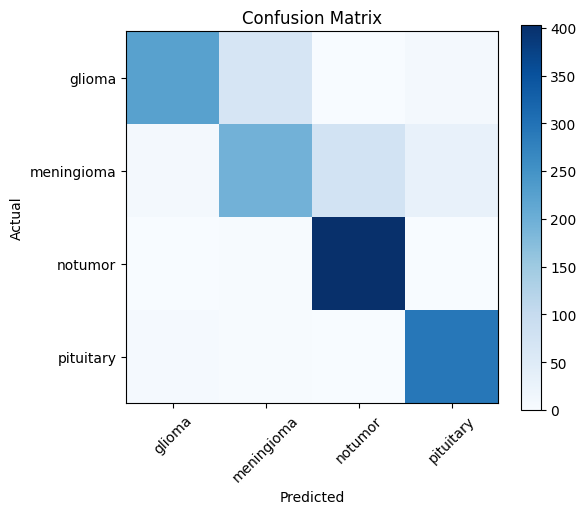

Model saved as brain_tumor_cnn_model.h5


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix

train_dir = "../Datasets/processed/Image_data/Training"
test_dir = "../Datasets/processed/Image_data/Testing"


IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 15

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=test_gen
)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title('Loss')
plt.legend()
plt.show()

test_gen.reset()
preds = model.predict(test_gen)
y_pred = np.argmax(preds, axis=1)
y_true = test_gen.classes

print("Classification Report:\n", classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys())))
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,5))
plt.title("Confusion Matrix")
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=np.arange(len(test_gen.class_indices)), labels=list(test_gen.class_indices.keys()), rotation=45)
plt.yticks(ticks=np.arange(len(test_gen.class_indices)), labels=list(test_gen.class_indices.keys()))
plt.show()